## Королев Игорь Михайлович
Группа: М8О-308Б-19

Почта: ikorolew02@gmail.com

# Лабораторная работа №0

**Цель работы:** Выбрать набор данных. Поставить задачу, которую необходимо решить с помощью эти данных. Определить что нужно получить на выходе, как это измерять, посмотреть на сами данные. Определить являются ли данные грязными или чистыми. Есть ли у данных пропуски. Как зависят между собой признаки.

**Задача:** На наборе данных о сердечной недостаточности подготовить данные для решения бинарной классификации наличия сердечной недостаточности. С помощью датасета необходимо определять, есть ли у пациента сердечная недостаточноть.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Видно, что данные не имеют нулевых значений.

In [5]:
data.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [6]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
data.describe(include=object).T

count unique     top freq
Sex              918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460

In [8]:
data.duplicated().value_counts()

False    918
dtype: int64

Видно, все данные являются непродублированными.

In [9]:
y = data['HeartDisease']
print('Процент пациентов, у которых есть болезнь сердца: {} % ({} пациентов)'.format(round(y.value_counts(normalize=True)[1]*100,2), y.value_counts()[1]))
print('Процент пациентов, у которых есть болезнь сердца: {} % ({} пациентов)'.format(round(y.value_counts(normalize=True)[0]*100,2), y.value_counts()[0]))

Процент пациентов, у которых есть болезнь сердца: 55.34 % (508 пациентов)
Процент пациентов, у которых есть болезнь сердца: 44.66 % (410 пациентов)


In [10]:
numerical = data.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
categorical = data.select_dtypes('object').columns

print('Численные признаки: {}'.format(data[numerical].columns))
print('Категориальные признаки: {}'.format(data[categorical].columns))

Численные признаки: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
Категориальные признаки: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [11]:
data[numerical].head().T

0      1      2      3      4
Age           40.0   49.0   37.0   48.0   54.0
RestingBP    140.0  160.0  130.0  138.0  150.0
Cholesterol  289.0  180.0  283.0  214.0  195.0
FastingBS      0.0    0.0    0.0    0.0    0.0
MaxHR        172.0  156.0   98.0  108.0  122.0
Oldpeak        0.0    1.0    0.0    1.5    0.0

In [12]:
data[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [13]:
print('Смещение: {}'.format(data['HeartDisease'].skew()))
print('Эксцесс (острота пика распределения СВ): {}'.format(data['HeartDisease'].kurtosis()))

Смещение: -0.21508633825088655
Эксцесс (острота пика распределения СВ): -1.9580084425329685


In [14]:
figure = px.histogram(data, x="HeartDisease", color="Sex", hover_data=data.columns,
title="Распространение болезни сердца среди полов", barmode="group")
figure.show()

* Почти у 55% ​​пациентов были пороки сердца.
* У 508 пациентов были пороки сердца.
* Почти у 45% пациентов не было заболеваний сердца.
* У 410 пациентов не было болезней сердца

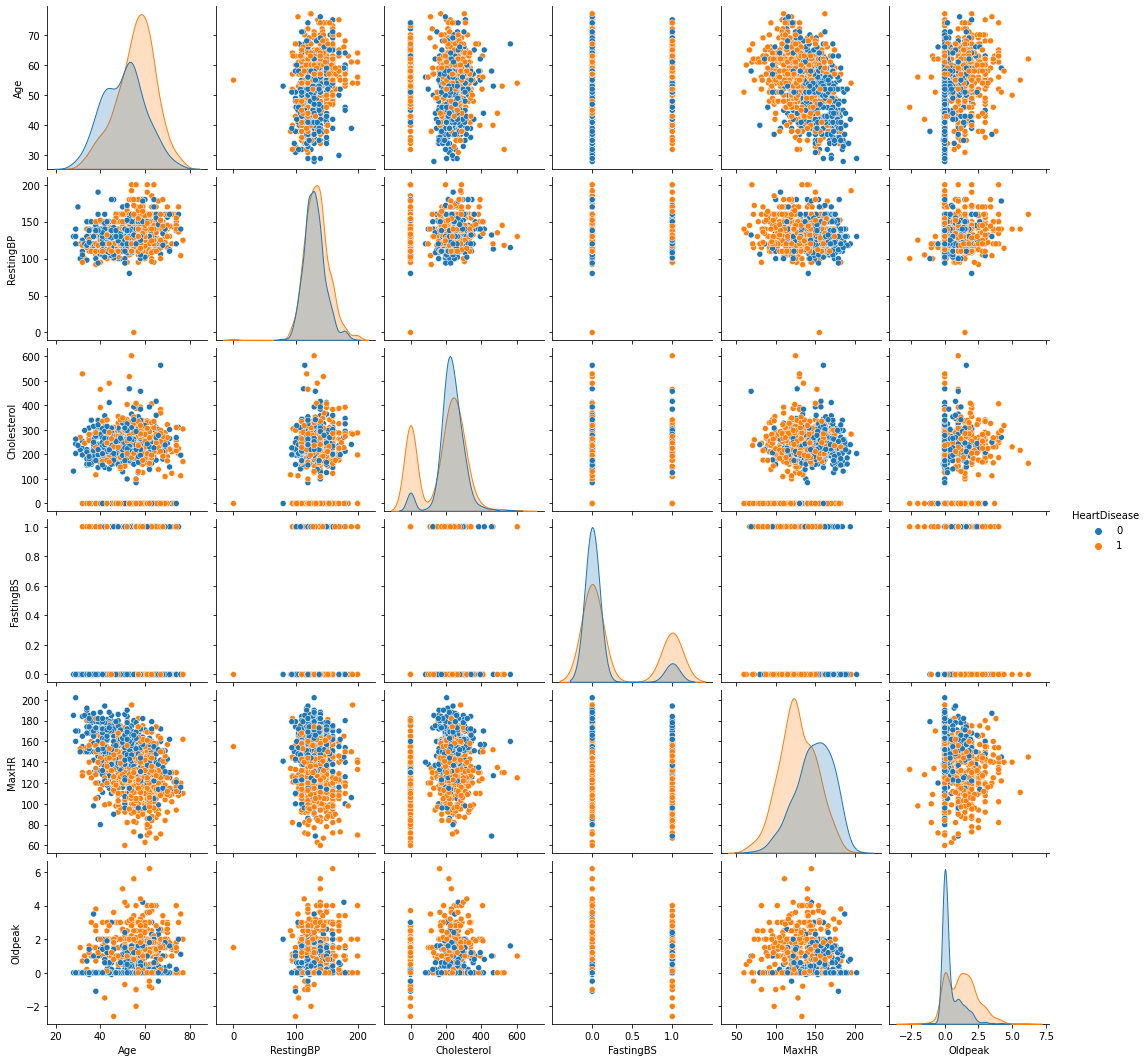

In [15]:
sns.pairplot(data, hue="HeartDisease")

In [16]:
data[numerical].plot()

<AxesSubplot:>

Слева - количество мужчин и женщин, которые не имеют болезни сердца.

Справа - количество мужчин и женщин с болезнью сердца.

In [17]:
figure = px.histogram(data, x="ChestPainType", color="Sex", hover_data=data.columns,
title="Типы грудной боли", barmode="group")
figure.show()

Из гистограммы можно увиедть, что у часто у мужчин встречаются типы грудной боли ASY.

In [18]:
figure = px.histogram(data, x="Sex", hover_data=data.columns,
title="Соотношения полов")
figure.show()

In [19]:
figure = px.histogram(data, x="RestingECG", hover_data=data.columns,
title="Распределение ЭКГ покоя (Resting ECG)")
figure.show()

[]

<Figure size 1440x1440 with 0 Axes>

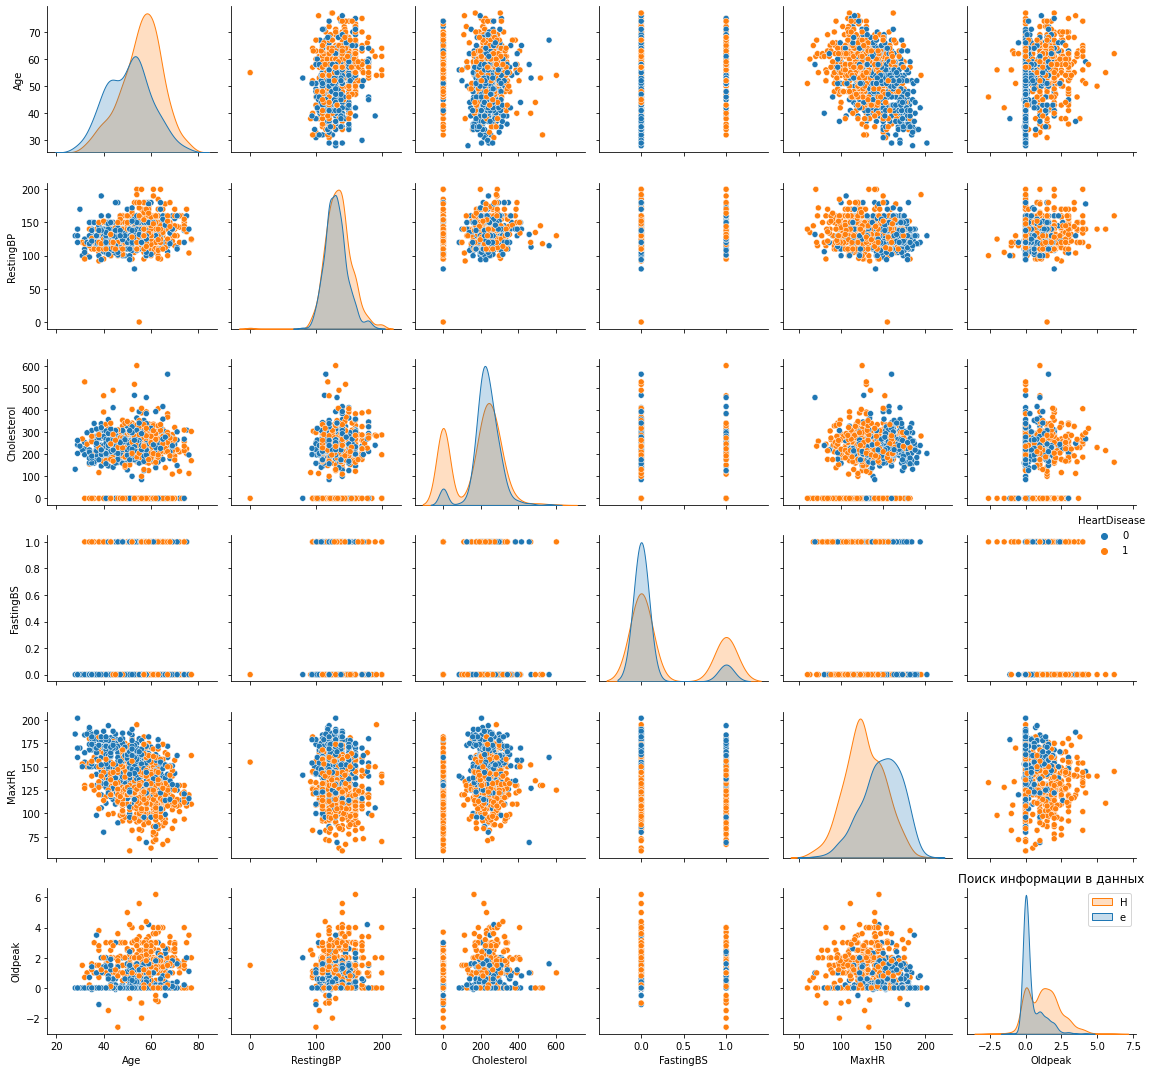

In [20]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, hue="HeartDisease")
plt.title("Поиск информации в данных")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [21]:
figure = px.box(data,y="Age",x="HeartDisease",title=f"Distrubution of Age")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [22]:
figure = px.box(data,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [23]:
figure = px.box(data,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [24]:
figure = px.box(data,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [25]:
figure = px.box(data,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

<AxesSubplot:>

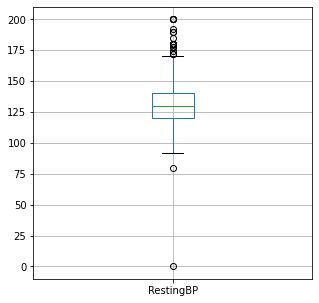

In [26]:
data.boxplot(column=['RestingBP'], figsize=(5, 5))

# (data,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")

In [ ]:
def pie_charts(data, feature, target):
    colors = sns.color_palette('pastel')[0:5]
    fig,axes = plt.subplots(1,2,figsize=(12,8))
    labels = data[feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(data[data[target]=="No"][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No {}'.format(target),fontsize=15)
    axes[1].pie(data[data[target]=="Yes"][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes {}'.format(target),fontsize=15)

    plt.legend(title = feature, fontsize=15, title_fontsize=15)
    plt.show()

In [ ]:
# Приведём значения признака Sex к числовому значению. Мужчина - 0, Женщина - 1
data['Sex'] = data['Sex'].map({'M' : 0, 'F' : 1}).astype(int)

In [ ]:
data = pd.concat([data, pd.get_dummies(data.ChestPainType, prefix='Chest_pain')], axis=1)
data.drop("ChestPainType", axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data.RestingECG, prefix='Rest_ECG')], axis=1)
data.drop("RestingECG", axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data.ST_Slope, prefix='ST_slope')], axis=1)
data.drop("ST_Slope", axis=1, inplace=True)

In [ ]:
figure = plt.figure(figsize=(30, 10))
ax = figure.add_subplot()
ax.set_title('Матрица корелляции')

sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidth=0.1)

Положительная корреляция - при увеличении (или уменьшении )

На основе полученной корреляционной матрицы можно видеть:
* Слабая коррелляция между числовыми значениями и целевой переменной HeartDisease
* Максимальная частота сердечных сокращений имеет отрицательную корреляцию с HeartDisease
* Холестерин имеет отрицательную корреляцию с HeartDisease

Выведем информацию о категориальных данных

In [27]:
y = data['HeartDisease']
print('Процент пациентов, у которых есть болезнь сердца: {} % ({} пациентов)'.format(round(y.value_counts(normalize=True)[1]*100,2), y.value_counts()[1]))
print('Процент пациентов, у которых есть болезнь сердца: {} % ({} пациентов)'.format(round(y.value_counts(normalize=True)[0]*100,2), y.value_counts()[0]))

print('Процент женщин, у которых есть болезнь сердца: {} % ({} пациентов)'.format(round(y.value_counts(normalize=True)[1]*100,2), y.value_counts()[1]))

Процент пациентов, у которых есть болезнь сердца: 55.34 % (508 пациентов)
Процент пациентов, у которых есть болезнь сердца: 44.66 % (410 пациентов)
Процент женщин, у которых есть болезнь сердца: 55.34 % (508 пациентов)


Нормализация данных

In [ ]:
categorical

In [ ]:
data.info()

In [28]:
final_data = pd.get_dummies(data, drop_first=True)

In [29]:
final_data

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0        1                  1                  0                 0   
1        0                  0                  1                 0   
2        1                  1                  0                 0   
3        0                  0                  0                 0   
4        1                  0                  1                 0   
..     ...                ...                ...               ...   
913      1                  0                  0                 1   
914      1                  0                  0                 0   
915      1                  0                  0                 0   
916      0                  1                  0                 0   
917      1                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                    1              0                 0              0   
1                    1              0                 0              1   
2                    0              1                 0              0   
3                    1              0                 1              1   
4                    1              0                 0              0   
..                 ...            ...               ...            ...   
913                  1              0                 0              1   
914                  1              0                 0              1   
915                  1              0                 1              1   
916                  0              0                 0              1   
917                  1              0                 0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 16 columns]

In [ ]:
# Приведём значения признака Sex к числовому значению. Мужчина - 0, Женщина - 1
# data['Sex'] = data['Sex'].map({'M' : 0, 'F' : 1}).astype(int)
# final_data = pd.get_dummies(data, columns=categorical[1:])

In [ ]:
final_data

In [66]:
X = final_data.drop(columns=['HeartDisease'], axis=1)
Y = final_data['HeartDisease']
standardizer = StandardScaler()
X_scaled=standardizer.fit_transform(X)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [68]:
SVM_model = SVC(random_state=300)
SVM_model.fit(X_train, Y_train)
y_pred = SVM_model.predict(X_test)
y_train_pred = SVM_model.predict(X_train)

svm_f1 = f1_score(Y_test, y_pred)
svm_acc = accuracy_score(Y_test, y_pred)
svm_recall = recall_score(Y_test, y_pred)
svm_auc = roc_auc_score(Y_test, y_pred)

print(confusion_matrix(Y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(Y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_test_scaled, Y_test)

train_val(y_train, y_train_pred, Y_test, y_pred)

[[71 10]
 [11 92]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        81
           1       0.90      0.89      0.90       103

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

--------------------------------------------------------


NameError: name 'plot_confusion_matrix' is not defined